# 🔧 Corrected & Complete EV Consumer Segmentation Notebook
Includes EDA, Demographic Segmentation, KMeans Clustering, and Visualizations.
**Dataset used:** `Sample_EV_Adoption_Dataset.csv`

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Load original dataset
df = pd.read_csv('/content/Sample_EV_Adoption_Dataset(1).csv')

# Decode values
gender_map = {1: 'Male', 2: 'Female'}
age_map = {1: '18-24', 2: '25-34', 3: '35-44', 4: '45-54', 5: '55+'}
occupation_map = {1: 'Student', 2: 'Self-employed', 3: 'Private Sector', 4: 'Government Service'}

df['Gender'] = df['Gender'].map(gender_map)
df['Age Group'] = df['Age Group'].map(age_map)
df['Occupation'] = df['Occupation'].map(occupation_map)

df.head()

,Respondent ID,Gender,Age Group,Occupation,K1,K2,K3,K4,K5,ATT1,ATT2,ATT3,ATT4,ATT5,P1,P2,P3,P4,P5
0,1,Male,25-34,Private Sector,1,2,2,3,2,1,1,2,1,1,2,2,3,2,2
1,2,Female,35-44,Student,2,2,1,2,3,2,2,3,1,1,1,1,1,1,1
2,3,Male,18-24,Government Service,3,3,2,4,3,2,3,3,2,2,3,4,4,3,3
3,4,Female,45-54,Self-employed,1,1,1,1,1,1,1,2,1,1,1,1,1,1,1
4,5,Male,25-34,Private Sector,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2


/tmp/ipython-input-3-1636611291.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender', data=df, palette='pastel')


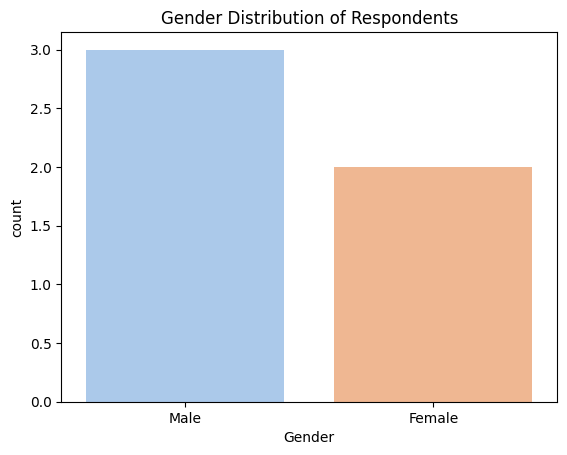

In [ ]:
sns.countplot(x='Gender', data=df, palette='pastel')
plt.title('Gender Distribution of Respondents')
plt.show()

/tmp/ipython-input-4-415702835.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Age Group', data=df, palette='muted')


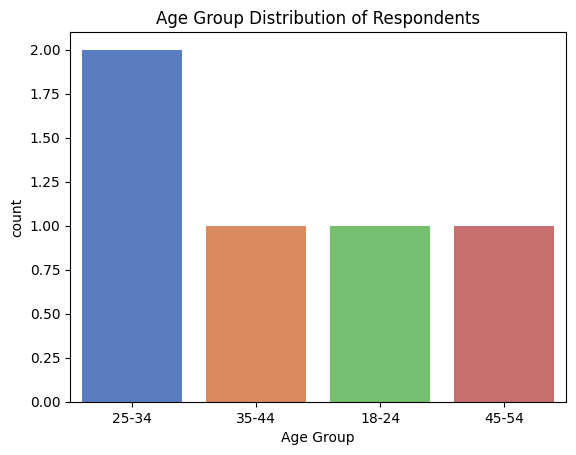

In [ ]:
sns.countplot(x='Age Group', data=df, palette='muted')
plt.title('Age Group Distribution of Respondents')
plt.show()

/tmp/ipython-input-5-768709325.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Occupation', data=df, palette='deep')


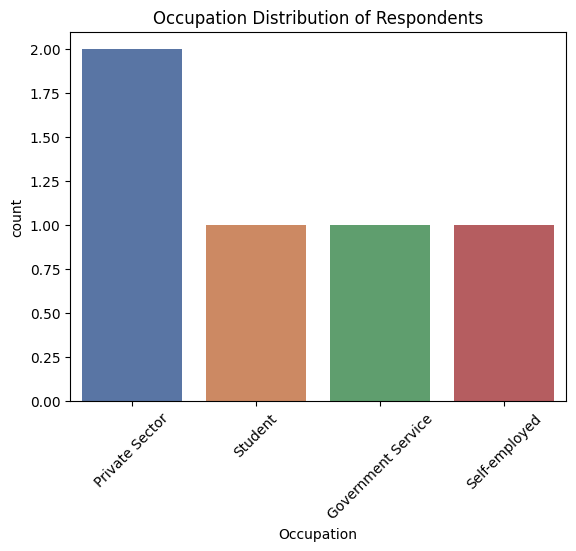

In [ ]:
sns.countplot(x='Occupation', data=df, palette='deep')
plt.title('Occupation Distribution of Respondents')
plt.xticks(rotation=45)
plt.show()

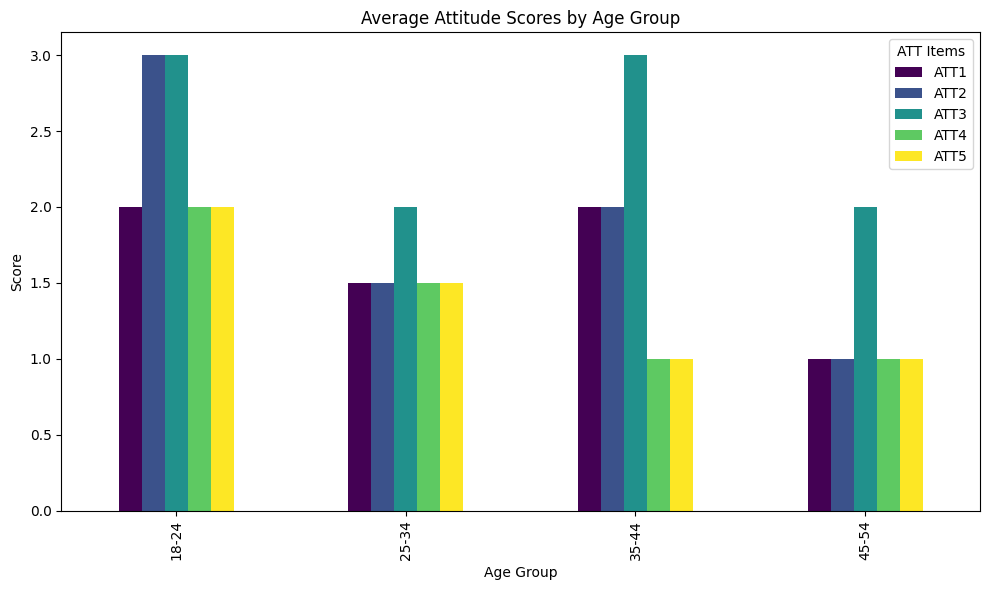

In [ ]:
att_cols = ['ATT1', 'ATT2', 'ATT3', 'ATT4', 'ATT5']
att_avg_by_age = df.groupby('Age Group')[att_cols].mean()
att_avg_by_age.plot(kind='bar', figsize=(10, 6), colormap='viridis')
plt.title('Average Attitude Scores by Age Group')
plt.ylabel('Score')
plt.legend(title='ATT Items')
plt.tight_layout()
plt.show()

In [ ]:
# One-hot encoding for ML
encoded = pd.get_dummies(df[['Gender', 'Age Group', 'Occupation']], drop_first=True)
ml_df = pd.concat([encoded, df[att_cols + [col for col in df.columns if col.startswith('K') or col.startswith('P')]]], axis=1)

In [ ]:
scaler = StandardScaler()
scaled = scaler.fit_transform(ml_df)

kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
clusters = kmeans.fit_predict(scaled)

df['Cluster'] = clusters

In [ ]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled)
df['PCA1'] = pca_result[:, 0]
df['PCA2'] = pca_result[:, 1]

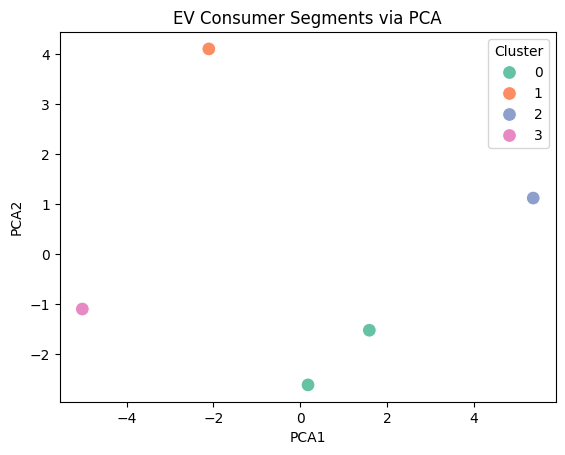

In [ ]:
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='Cluster', palette='Set2', s=100)
plt.title('EV Consumer Segments via PCA')
plt.show()

/tmp/ipython-input-11-2025702717.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Cluster', data=df, palette='pastel')


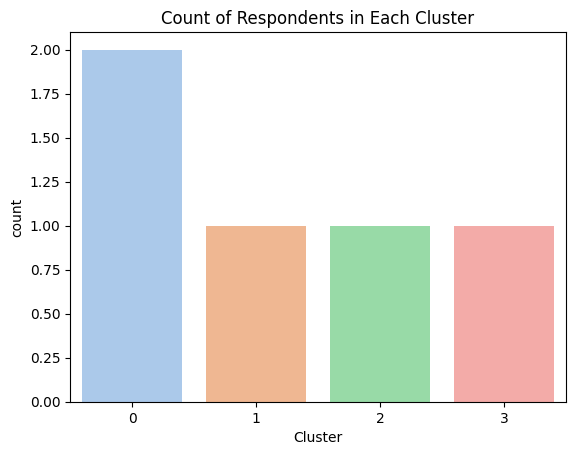

In [ ]:
sns.countplot(x='Cluster', data=df, palette='pastel')
plt.title('Count of Respondents in Each Cluster')
plt.show()

/tmp/ipython-input-12-2508136660.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y='ATT1', data=df, palette='cool')


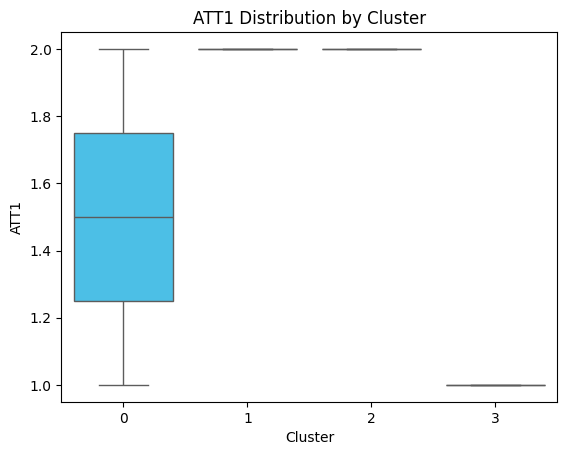

In [ ]:
sns.boxplot(x='Cluster', y='ATT1', data=df, palette='cool')
plt.title('ATT1 Distribution by Cluster')
plt.show()

/tmp/ipython-input-13-1156816285.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Cluster', y='P1', data=df, palette='Set3')


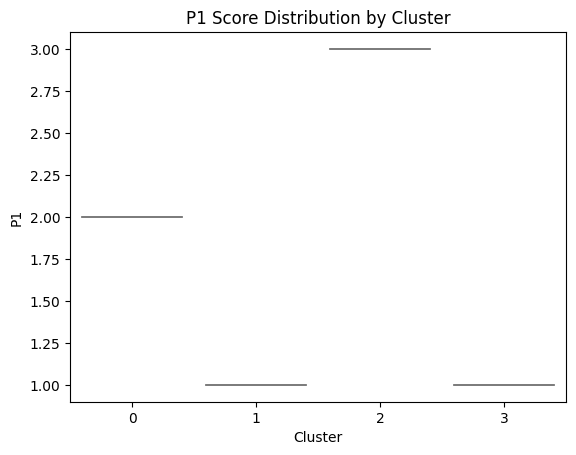

In [ ]:
sns.violinplot(x='Cluster', y='P1', data=df, palette='Set3')
plt.title('P1 Score Distribution by Cluster')
plt.show()

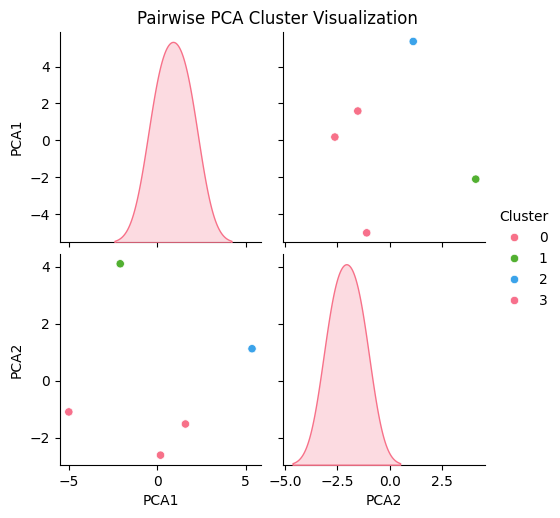

In [ ]:
sns.pairplot(df[['PCA1', 'PCA2', 'Cluster']], hue='Cluster', palette='husl')
plt.suptitle('Pairwise PCA Cluster Visualization', y=1.02)
plt.show()

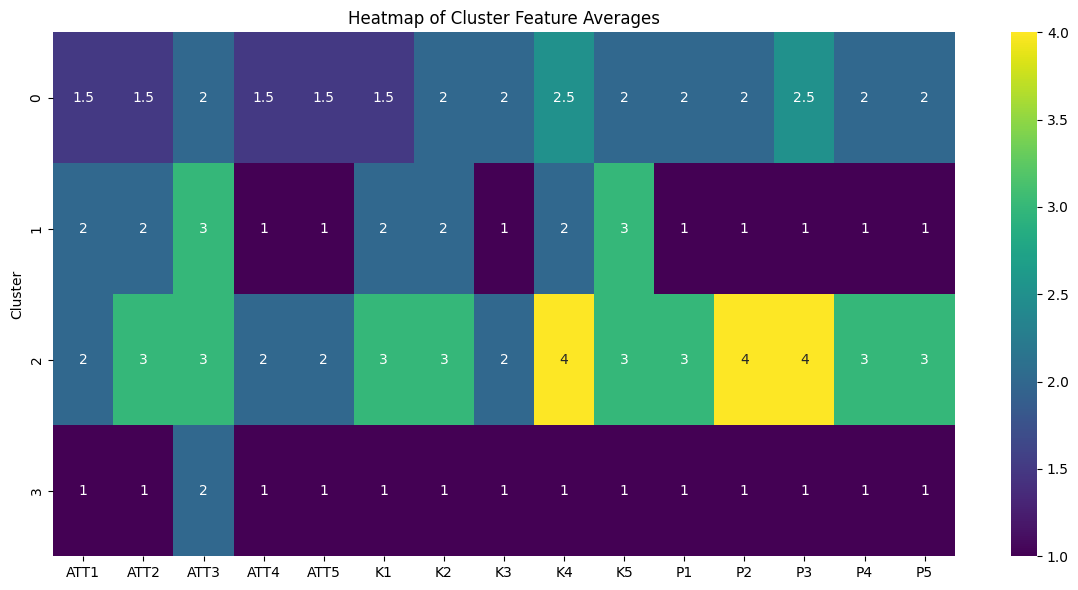

In [ ]:
import numpy as np
plt.figure(figsize=(12,6))
sns.heatmap(df.groupby('Cluster')[att_cols + [f'K{i}' for i in range(1,6)] + [f'P{i}' for i in range(1,6)]].mean(), annot=True, cmap='viridis')
plt.title('Heatmap of Cluster Feature Averages')
plt.tight_layout()
plt.show()

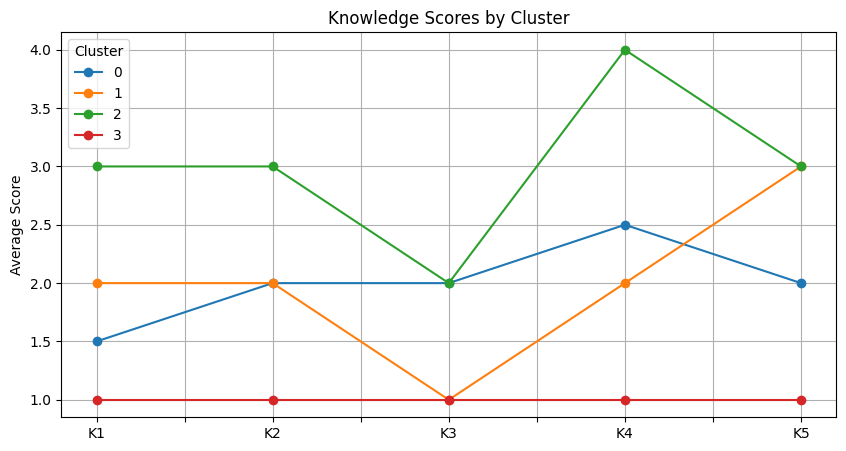

In [ ]:
k_means = df.groupby('Cluster')[[f'K{i}' for i in range(1,6)]].mean().T
k_means.plot(kind='line', marker='o', figsize=(10,5))
plt.title('Knowledge Scores by Cluster')
plt.ylabel('Average Score')
plt.grid(True)
plt.xticks(rotation=0)
plt.show()

## 📌 Interpretation Summary
- Clusters represent groups with shared behavioral patterns.
- Higher ATT or P scores → EV readiness.
- Lower K scores → Need awareness campaigns.
- Demographic links help target pricing, messaging, and outreach.